# IR-Active Band Combinations and Overtones

This notebook demonstrates how the library can be used to compute overtones and overtone and fundamental frequency combinations, within a range of interest of 0.9 - 4.0 µm.

Here we compute overtones for 3 molecules or relevance to the study planetary surface mineralogy: H2O, OH and CO3.
These overtones are provided by Hunt, "Spectral signatures of particulate minerals in the visible and near infrared", Geophysics, 42, 3, pp. 501-511, April 1977, DOI:10.1190/1.1440721

## Overview

We import the library:

In [1]:
import ir_active_bands as irab

Let's start by exploring the absorptions of H2O. We initiate the class object, and check that the data has been stored in a dataframe.

In [2]:
h2o_absorptions = irab.IRActiveBands('H2O')

Let's check what the H2O absorptions are:

In [3]:
print(h2o_absorptions.fundamentals)

    band-centre         type  level
v1        3.106  fundamental    1.0
v2        6.080  fundamental    1.0
v3        2.903  fundamental    1.0


We can also check this by simply printing the h2o_absorptions IRActiveBands object:

In [4]:
print(h2o_absorptions)

    band-centre         type  level
v1        3.106  fundamental    1.0
v2        6.080  fundamental    1.0
v3        2.903  fundamental    1.0


We can perform all of the computations, and visualise the results, simply by calling:

Computing overtones...
Computing combinations...
Dropping out-of-range absorptions...
Visualising absorptions...


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/ticker.py:2788: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


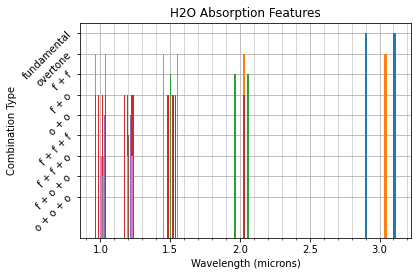

done
            band-centre                                 type  level
v1             3.106000                          fundamental    1.0
v3             2.903000                          fundamental    1.0
2v1            1.553000                             overtone    0.9
3v1            1.035333                             overtone    0.9
2v2            3.040000                             overtone    0.9
3v2            2.026667                             overtone    0.9
2v3            1.451500                             overtone    0.9
3v3            0.967667                             overtone    0.9
v1+v2          2.055789              fundamental+fundamental    0.8
v1+v3          1.500536              fundamental+fundamental    0.8
v1+2v1         1.035333                 fundamental+overtone    0.7
v1+2v2         1.536323                 fundamental+overtone    0.7
v1+3v2         1.226424                 fundamental+overtone    0.7
v1+2v3         0.989218                 fun

In [5]:
absorption_table = h2o_absorptions.compute_combinations_and_show(range = [0.9, 4.0])
print(absorption_table)

## Breakdown

Now let's look at some of the steps that go into computing the overtones and the combinations. We'll make a fresh object, this time looking at the CO3 molecule.

In [8]:
co3_absorptions = irab.IRActiveBands('CO3')

We compute the first 3 overtones, and put these in a new DataFrame, along with the fundamentals:

In [9]:
co3_absorptions.compute_overtones()
print(co3_absorptions)

     band-centre         type  level
v1      9.230000  fundamental    1.0
v2     11.360000  fundamental    1.0
v3      7.000000  fundamental    1.0
v4     14.000000  fundamental    1.0
2v1     4.615000     overtone    0.9
3v1     3.076667     overtone    0.9
2v2     5.680000     overtone    0.9
3v2     3.786667     overtone    0.9
2v3     3.500000     overtone    0.9
3v3     2.333333     overtone    0.9
2v4     7.000000     overtone    0.9
3v4     4.666667     overtone    0.9


These are computed by converting from wavelength to wavenmumber (frequency), and multiplying the fundamentals by integers. The wavenumbers are then converted back to wavelength (microns). This is performed using the ir_active_bands.wvl2wvn() and ir_active_bands.wvn2wvl() functions.

Now we'll compute the combinations of these fundamentals and overtones, again adding these to the dictionary.
We only compute pair and triplet combinations, under the assumption that higher order combinations will become negligibly weak.

In [10]:
co3_absorptions.compute_combinations()
print(co3_absorptions)

             band-centre                                 type  level
v1              9.230000                          fundamental    1.0
v2             11.360000                          fundamental    1.0
v3              7.000000                          fundamental    1.0
v4             14.000000                          fundamental    1.0
2v1             4.615000                             overtone    0.9
3v1             3.076667                             overtone    0.9
2v2             5.680000                             overtone    0.9
3v2             3.786667                             overtone    0.9
2v3             3.500000                             overtone    0.9
3v3             2.333333                             overtone    0.9
2v4             7.000000                             overtone    0.9
3v4             4.666667                             overtone    0.9
v1+v2           5.092414              fundamental+fundamental    0.8
v1+v3           3.980900          

As there are can be a large number of possible combinations, we discard all that are not in our range of interest, 0.9 - 4.0 µm:

In [11]:
co3_absorptions.filter_absorptions([0.9,4.0])
print(co3_absorptions)

             band-centre                                 type  level
3v1             3.076667                             overtone    0.9
3v2             3.786667                             overtone    0.9
2v3             3.500000                             overtone    0.9
3v3             2.333333                             overtone    0.9
v1+v3           3.980900              fundamental+fundamental    0.8
v1+2v1          3.076667                 fundamental+overtone    0.7
v1+3v1          2.307500                 fundamental+overtone    0.7
v1+2v2          3.516190                 fundamental+overtone    0.7
v1+3v2          2.685091                 fundamental+overtone    0.7
v1+2v3          2.537706                 fundamental+overtone    0.7
v1+3v3          1.862496                 fundamental+overtone    0.7
v1+2v4          3.980900                 fundamental+overtone    0.7
v1+3v4          3.099544                 fundamental+overtone    0.7
v2+2v1          3.281778          

Finally, we visualise the positions of these absorption features, and illustrate whether they are fundamentals, overtones, or different types of combinations, by plotting the data in a bar-plot.

The position on the y-axis indicates the combination type, an illustration that is reinforced by assigning a separate colour to each.

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/ticker.py:2788: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


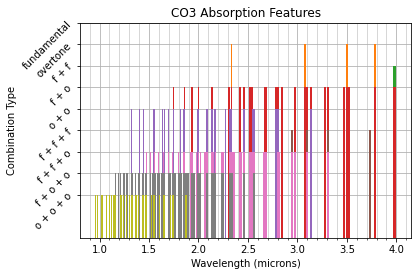

done


In [12]:
co3_absorptions.visualise_absorptions()

The data can also be exported to a csv file, using the ir_active_bands.export_absorptions(path) function.

# Future Work

The tool should be expanded in the following ways:
 - Calculation of cross-sections of the different features, such that the intensity or band-depth of each feature can be estimated and compared.
 - Computation of the effects of various transition metals and cations on the absorptions, and the resultant combinations.